<a href="https://colab.research.google.com/github/adityanarayan794/TFpublic/blob/master/Tensorflow_fmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
#Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Loading the data sets

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels) , ( test_images, test_labels) = fashion_mnist.load_data()

In [43]:
#Explore Data
print("Trainig Images")
print("Shape : {}".format(train_images.shape))
print("Length : {}".format(len(train_images)))
print("")
print("Labels : {}".format(train_labels))

Trainig Images
Shape : (60000, 28, 28)
Length : 60000

Labels : [9 0 0 ... 3 0 5]


In [0]:
#Declare Class
class_names = ['T-shirt' , 'Trouser' , 'Pullovers' , 'Dress' , 'Coat' , 'Sandals' , 'Shirt' , 'Sneaker' , 'Bag', 'Ankle Boots|']

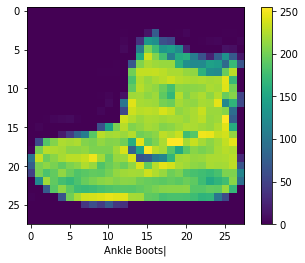

In [45]:
#View the Data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[0]])
plt.show()

In [0]:
#Normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

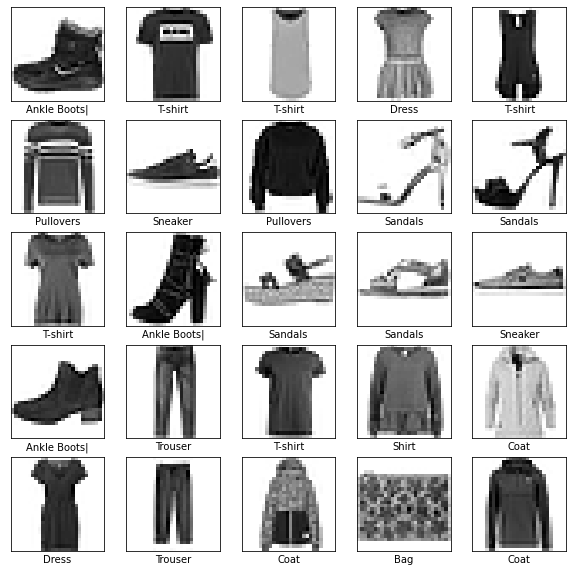

In [47]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
#Model
model = tf.keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(units=128 , activation='relu'),
        keras.layers.Dense(units=10)
])

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ['accuracy'])

In [67]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2841 - accuracy: 0.8942
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2699 - accuracy: 0.8996
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2596 - accuracy: 0.9030
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2481 - accuracy: 0.9078
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2416 - accuracy: 0.9100
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2341 - accuracy: 0.9124
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2258 - accuracy: 0.9149
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2190 - accuracy: 0.9189
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2136 - accuracy: 0.9200
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.206

In [68]:
test_loss , test_accuracy = model.evaluate(test_images,test_labels ,verbose=2)

313/313 - 0s - loss: 0.3406 - accuracy: 0.8874


In [0]:
prediction_model = tf.keras.Sequential([model , keras.layers.Softmax()])
predictions = prediction_model.predict(test_images)

In [75]:
np.argmax(predictions[1])

2

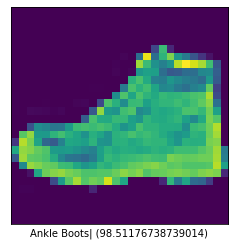

In [80]:
i=28
plt.figure()
plt.imshow(test_images[i])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel("{} ({})".format(class_names[np.argmax(predictions[i])],100*np.max(predictions[i])))
plt.show()

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


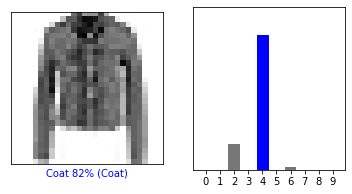

In [108]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(10 , predictions[10] , test_labels , test_images)
plt.subplot(1,2,2)
plot_value_array(10 , predictions[10]  , test_labels )
plt.show()

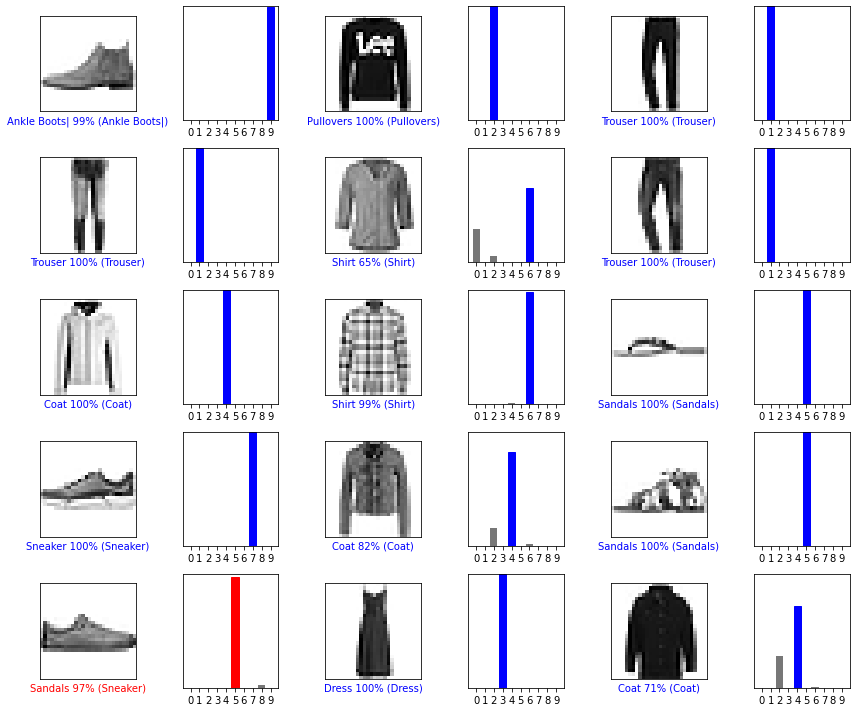

In [109]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
